In [0]:
# import
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision.datasets as dsets

In [0]:
# Hyperparameters
EPOCH =  # Define the training times
BATCH_SIZE = 64
TIME_STEP = 28
INPUT_SIZE = 28
LR = 0.01
DOWNLOAD_MNIST = True

In [0]:
# MNIST digital data set
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,
    transform=transforms.ToTensor(),
    download=DOWNLOAD_MNIST,
)


torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


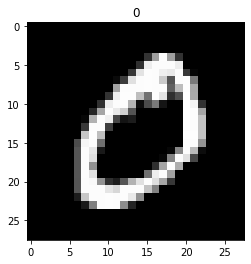

In [18]:
# Print one of the examples
print(train_data.__.__)  # print the torch.Size of data(as below)
print(train_data.__.__)  # print the torch.Size of labels(as below)
plt.imshow(train_data.train_data[1], cmap='gray')
plt.title('%i' % train_data.train_labels[1])
plt.show()

In [0]:
# Data loader
train_loader = torch.utils.data.DataLoader(
    dataset=__, # MNIST digital data set
    batch_size=BATCH_SIZE,
    shuffle=True,    
)

In [20]:
# Convert test_data to Variable, and take out the first 2000 as test
test_data = dsets.MNIST(
    root='./mnist/', 
    train=False,
    transform=transforms.ToTensor(),
)
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels.numpy().squeeze()[:2000]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.LSTM(  # If use nn.RNN(), it is almost impossible to learn
            input_size=INPUT_SIZE,
            hidden_size=64,  # hidden unit
            num_layers=1,  # rnn layers number
            batch_first=True,  # The batch size of input & output is 1 dimension. For example (batch, time_step, input_size)
        )
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, )  # zero initial hidden state
        
        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [22]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [26]:
# Train and test neural networks
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):        # gives batch data
        b_x = Variable(x.view(-1, 28, 28))              # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)                               # batch y
 
        output = __                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.__                           # clear gradients for this training step
        loss.__                                # backpropagation, compute gradients
        optimizer.step()                                # apply gradients
 
        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size)
            print('Epoch: ', __, '| train loss: %.4f' % __, '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3114 | test accuracy: 0.10
Epoch:  0 | train loss: 1.3816 | test accuracy: 0.52
Epoch:  0 | train loss: 0.8640 | test accuracy: 0.67
Epoch:  0 | train loss: 0.8618 | test accuracy: 0.78
Epoch:  0 | train loss: 0.6302 | test accuracy: 0.84
Epoch:  0 | train loss: 0.3067 | test accuracy: 0.87
Epoch:  0 | train loss: 0.4814 | test accuracy: 0.89
Epoch:  0 | train loss: 0.3070 | test accuracy: 0.89
Epoch:  0 | train loss: 0.3432 | test accuracy: 0.93
Epoch:  0 | train loss: 0.4534 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0740 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1413 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1141 | test accuracy: 0.92
Epoch:  0 | train loss: 0.3847 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1260 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2264 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0907 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2364 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0356 | test accuracy

In [25]:
# Print the first 10 test values
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[9 9 9 9 9 9 9 9 9 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
